In [1]:
from knowknow import *

In [2]:
from knowknow.datastore_cnts.count_cache import *

In [3]:
wos = Dataset('sociology-wos')

In [4]:
most_c = wos(ta=None).docs.sort_values('_count')[-50:]

for i, x in most_c.iterrows():
    print(x.ta,x['_count'])

Latour, B. 1152
Burt, R. 1157
Homans, G. 1158
Meyer, J. 1160
Snow, D. 1160
Wuthnow, R. 1168
Mcadam, D. 1168
Gouldner, A. 1184
Scott, J. 1194
Blalock, H. 1203
Williams, R. 1232
Connell, R. 1255
Diener, E. 1266
Simmel, G. 1270
Mead, G. 1289
Lipset, S. 1306
Merton, R. 1311
Stark, R. 1321
Garfinkel, H. 1329
Strauss, A. 1362
Sewell, W. 1371
Collins, R. 1380
Beck, U. 1390
Mills, C. 1392
Blumer, H. 1417
Tilly, C. 1456
Sampson, R. 1556
Habermas, J. 1622
Glaser, B. 1639
Wilson, W. 1644
Duncan, O. 1646
Hochschild, A. 1677
Van, D. 1712
Dimaggio, P. 1850
Massey, D. 2007
Portes, A. 2061
Putnam, R. 2122
Granovetter, M. 2146
Becker, H. 2149
Berger, P. 2243
Becker, G. 2270
Parsons, T. 2667
Durkheim, E. 2834
Foucault, M. 3008
Blau, P. 3147
Giddens, A. 3350
Coleman, J. 3402
Weber, M. 3402
Goffman, E. 3836
Bourdieu, P. 5381


In [5]:
from random import choice
to_examine = choice(list(most_c.ta))

In [6]:
print(to_examine)

Foucault, M.


In [7]:
allpubs = wos.items('c')

In [8]:
my_cits = [x for x in allpubs if x.author == to_examine]

In [9]:
my_cits

[( Cited article: Foucault, M.|1971|soc sc inform,v10,p7 ),
 ( Cited article: Foucault, M.|1976|histoire sexualite,v1 ),
 ( Cited article: Foucault, M.|1976|will knowledge hist,v1 ),
 ( Cited article: Foucault, M.|1979|hist sexuality,v1 ),
 ( Cited article: Foucault, M.|1979|ideology consciousne,v5,p5 ),
 ( Cited article: Foucault, M.|1982|crit inquiry,v8,p777 ),
 ( Cited article: Foucault, M.|1982|michel foucault ethi,v1,p223 ),
 ( Cited article: Foucault, M.|1984|hist sexualite,v3 ),
 ( Cited article: Foucault, M.|1985|hist sexuality,v2 ),
 ( Cited article: Foucault, M.|1985|use pleasure hist se,v2 ),
 ( Cited article: Foucault, M.|1986|care self hist sexua,v3 ),
 ( Cited article: Foucault, M.|1986|diacritics,v16,p22 ),
 ( Cited article: Foucault, M.|1986|econ soc,v15,p88 ),
 ( Cited article: Foucault, M.|1986|hist sexuality,v3 ),
 ( Cited article: Foucault, M.|1988|technologies self se,p16 ),
 ( Cited article: Foucault, M.|1990|hist sexuality intro,v1 ),
 ( Cited article: Foucault, 

Text(0.5, 1.0, 'Works cited with Foucault, M.')

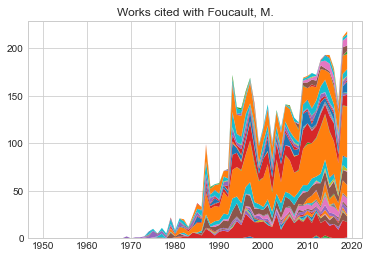

In [10]:
yr_plts = [
    [ wos( c=x, fy=YY ).docs for YY in range(1950,2020) ]
    for x in my_cits
]

plt.stackplot(range(1950,2020),*yr_plts, labels=range(len(my_cits)));
plt.title("Works cited with %s" % to_examine)
#plt.legend();

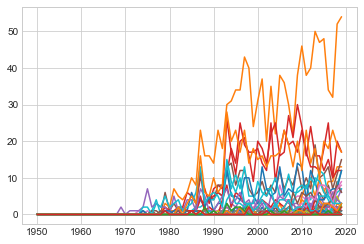

In [11]:
yr_plts = [
    [ wos( cited_pub = x, publication_year = YY ).cits for YY in range(1950,2020) ]
    for x in my_cits
]

for yrplt in yr_plts:
    plt.plot(range(1950,2020),yrplt);
#plt.legend();

In [12]:
wos.network( 'c1.c2' )

AttributeError: 'Dataset' object has no attribute 'network'

In [ ]:
cocits = [x for x in cnt['c1.c2'] if cnt['c1.c2'][x]>0 and x.c1.split("|")[0] == to_examine]

In [ ]:
cocits = sorted(cocits, key=lambda x:-cnt['c1.c2'][x])
#cocits = [x.c2 for x in cocits]

In [ ]:
cocits[:10]

In [ ]:
cauths = defaultdict(int)
for x in cnt['c1.c2']:
    if cnt['c1.c2'][x]>0 and x.c1.split("|")[0] == to_examine:
        cauths[x.c2.split("|")[0]] +=  cnt['c1.c2'][x]


In [ ]:
# make some sort of word cloud with this data
# these are the authors most often cited with this author
Counter(cauths).most_common()

In [ ]:
authors_to_network = [x[0] for x in Counter(cauths).most_common(15)]

In [ ]:
gcnt = defaultdict(int)

In [ ]:
for x,c in cnt['c1.c2'].items():
    a1 = x.c1.split("|")[0]
    a2 = x.c2.split("|")[0]
    if a1 in authors_to_network and a2 in authors_to_network:
        gcnt[(a1,a2)] += c
        #gcnt[(x.c2,x.c1)] += c

In [ ]:
G = nx.Graph()

In [ ]:
skipped = 0
counted = 0

In [ ]:
cnt['ta'][(a1,)]

In [ ]:
for (a1,a2),c in gcnt.items():
    if c > cnt['ta'][(a1,)]*cnt['ta'][(a2,)]*0.00005:
        G.add_edge(a1,a2, weight=c)
        counted += 1
    else:
        skipped += 1

In [ ]:
print(skipped,counted)

In [ ]:
plt.cm.Greys(250)

In [ ]:
# I can't figure out how, but the edges should be colored / sized by their LOG(weight)

nodes = G.nodes()
degree = G.degree(weight=True)
print(degree)
colors = np.array([degree[n] for n in nodes])
colors = 250*colors / np.max(colors)
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)
nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
nx.draw_networkx_labels(G,pos,font_color='w',font_size=10)
fig.set_facecolor('#0B243B')

plt.show()